In [1]:
from PIL import Image 
import numpy
import torch

xs = []
ys = []

for i in range(0, 10):
    img = Image.open(f'images/images/image_{i}.jpeg')
    I = numpy.asarray(img)
    #print("data", I)
    
    xs.append([257,257,257,0,0])
    ys.append(I[0][0].tolist())


    for rows in range(0, 16):
        for cols in range(0,16):
            if rows==15 and cols ==15:
                continue

            temp_x = I[rows][cols].tolist()
            temp_x.append(rows)
            temp_x.append(cols)

            xs.append(temp_x)
            if cols == 15:
                ys.append(I[rows+1][0].tolist())
            else:
                ys.append(I[rows][cols+1].tolist())
            
xs = torch.tensor(xs).float()
xs = xs/257
ys = torch.tensor(ys).float()
ys = ys/257

#print("Xs", xs)
#print("Ys", ys)


In [2]:

W1 = torch.randn((5, 1000), requires_grad=True)
B1 = torch.randn((1000), requires_grad=True)

W2 = torch.randn((1000, 3), requires_grad=True)
B2 = torch.randn((3), requires_grad=True)

params = (W1, B1, W2, B2)

In [4]:
losses =[]

for _ in range(50000):

    layer1 = xs @ W1 + B1
    tan_layer1 = torch.tanh(layer1)
    
    layer2 = tan_layer1 @ W2 + B2
    
    #counts = layer2.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # print("probs", probs.size())
    # sum = 0
    # for i in range(probs.shape[0]):
    #     actual_output = ys[i]
    #     predicted_prob_of_actual_output = probs[i][actual_output]
    #     sum += predicted_prob_of_actual_output
    # sum = sum / probs.shape[0]
    # neg_log_likelihood = -sum.log()

    loss = ((layer2 - ys) ** 2).mean()
    
    print("Train #", _ , " Loss: ", loss.item())
    losses.append(loss.item())
    
    for param in params:
        param.grad = None
        
    loss.backward()
    
    for param in params:
        param.data += -.004 * param.grad

Train # 0  Loss:  32436.943359375
Train # 1  Loss:  32436.943359375
Train # 2  Loss:  32436.943359375
Train # 3  Loss:  32436.943359375
Train # 4  Loss:  32436.943359375
Train # 5  Loss:  32436.943359375
Train # 6  Loss:  32436.943359375
Train # 7  Loss:  32436.943359375
Train # 8  Loss:  32436.943359375
Train # 9  Loss:  32436.943359375
Train # 10  Loss:  32436.943359375
Train # 11  Loss:  32436.943359375
Train # 12  Loss:  32436.943359375
Train # 13  Loss:  32436.943359375
Train # 14  Loss:  32436.943359375
Train # 15  Loss:  32436.943359375
Train # 16  Loss:  32436.943359375
Train # 17  Loss:  32436.943359375
Train # 18  Loss:  32436.943359375
Train # 19  Loss:  32436.943359375
Train # 20  Loss:  32436.943359375
Train # 21  Loss:  32436.943359375
Train # 22  Loss:  32436.943359375
Train # 23  Loss:  32436.943359375
Train # 24  Loss:  32436.943359375
Train # 25  Loss:  32436.943359375
Train # 26  Loss:  32436.943359375
Train # 27  Loss:  32436.943359375
Train # 28  Loss:  32436.94335

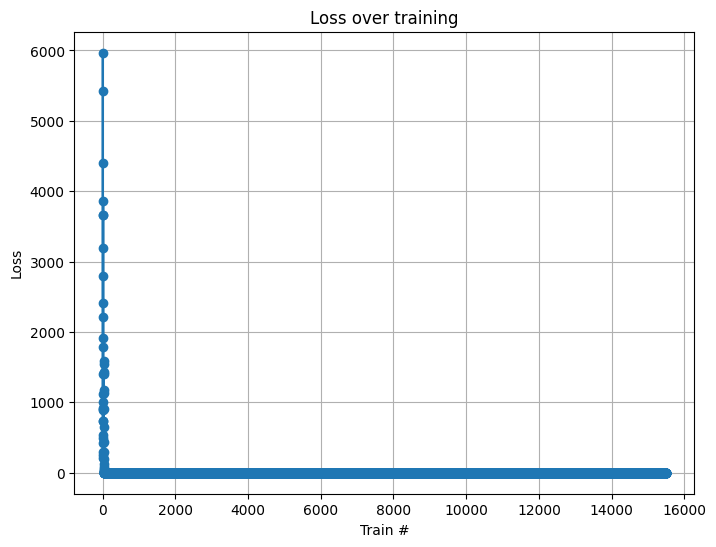

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(losses, marker='o', linestyle='-')

plt.xlabel('Train #')
plt.ylabel('Loss')
plt.title('Loss over training')
plt.grid(True)

plt.show()


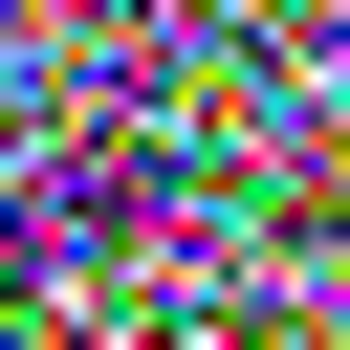

In [90]:
# sample from model
import PIL

def genOneImage():
    random_row = torch.randn((5)) * 257
    random_row[4]=0
    random_row[3]=0
    prev = random_row

   # prev = torch.tensor([257, 257, 257, 0, 0]).float()
    big_out = []

    for rows in range(0,16):
        cur_row = []

        for cols in range(0,16):

            #print("on row: ", rows, "col: ", cols, "inputting data", prev),

            #forward pass:
            layer1 = prev @ W1 + B1
            tan_layer1 = torch.tanh(layer1)
            layer2 = tan_layer1 @ W2 + B2

            #print("output", layer2)

            prev = layer2.tolist()
            cur_row.append(prev[0:3])

            prev.append(rows)
            prev.append(cols)
            prev = torch.tensor(prev).float()

            if (cols == 15):
                rows += 1
        
        big_out.append(cur_row)

    
    #print("big_out", big_out)
    asNumpy = numpy.array(big_out)
    asNumpy = asNumpy * 257
    
    #print(asNumpy.shape)
    image_generated = PIL.Image.fromarray(numpy.uint8(asNumpy))
    image_generated=image_generated.resize((350, 350))
    image_generated.save('image_generated.jpeg')
    
    display(image_generated)

    
genOneImage()